# Загрузка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
members_df = pd.read_csv('members.csv')
songs_df = pd.read_csv('songs.csv')
songs_extra_info_df = pd.read_csv('song_extra_info.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

In [3]:
members_df.head(2)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622


In [4]:
songs_df.head(2)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0


In [5]:
songs_extra_info_df.head(2)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015


In [6]:
train_df.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1


In [7]:
test_df.head(2)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library


In [8]:
sample_submission_df.head(2)

,id,target
0,0,0.5
1,1,0.5


# Анализ данных

In [9]:
import matplotlib.pyplot as plt

### members.csv

#### 'city'

In [10]:
members_df['city'].isna().sum()

0

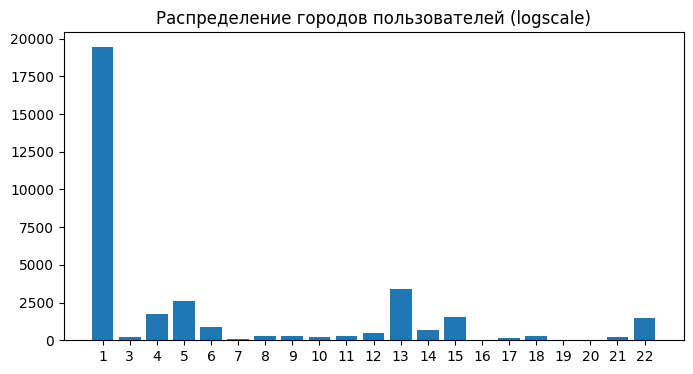

In [11]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

cities, counts = np.unique(members_df['city'].values, return_counts=True)

ax.bar(np.arange(len(cities)), counts);
ax.set_title('Распределение городов пользователей (logscale)')
ax.set_xticks(np.arange(len(cities)));
ax.set_xticklabels(cities);
plt.show()

Город номер 1 представлен значительно чаще чем другие

#### 'bd' - возраст

In [12]:
members_df['bd'].isna().sum()

0

Значений NaN нет, но можно было бы сделать предположение что неизвестный возраст записан в таблицу как 0, так как их уж слишком много, хотя специально регистрировать себя с возрастом 0 звучит бессмысленно

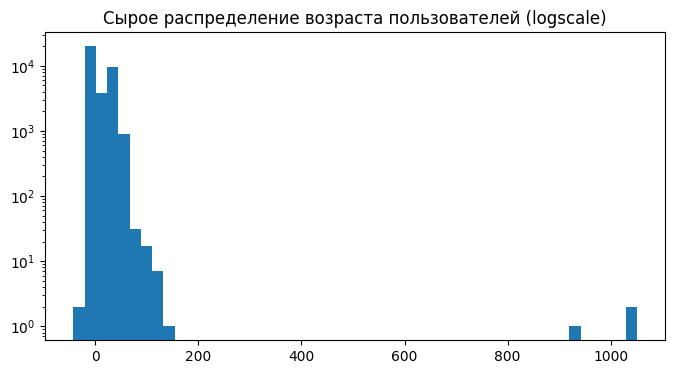

In [13]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

ax.hist(members_df['bd'], bins = 50);
ax.set_yscale('log');
ax.set_title('Сырое распределение возраста пользователей (logscale)')
plt.show()

Уберем бессмысленные значения возраста (те что меньше равны 0 или больше 99)

In [14]:
bad_age_idx = (members_df['bd'] <= 0) | (members_df['bd'] > 99)
members_df_temp = members_df[~bad_age_idx]
print(f'убрали {sum(bad_age_idx)} пользователей')

убрали 19956 пользователей


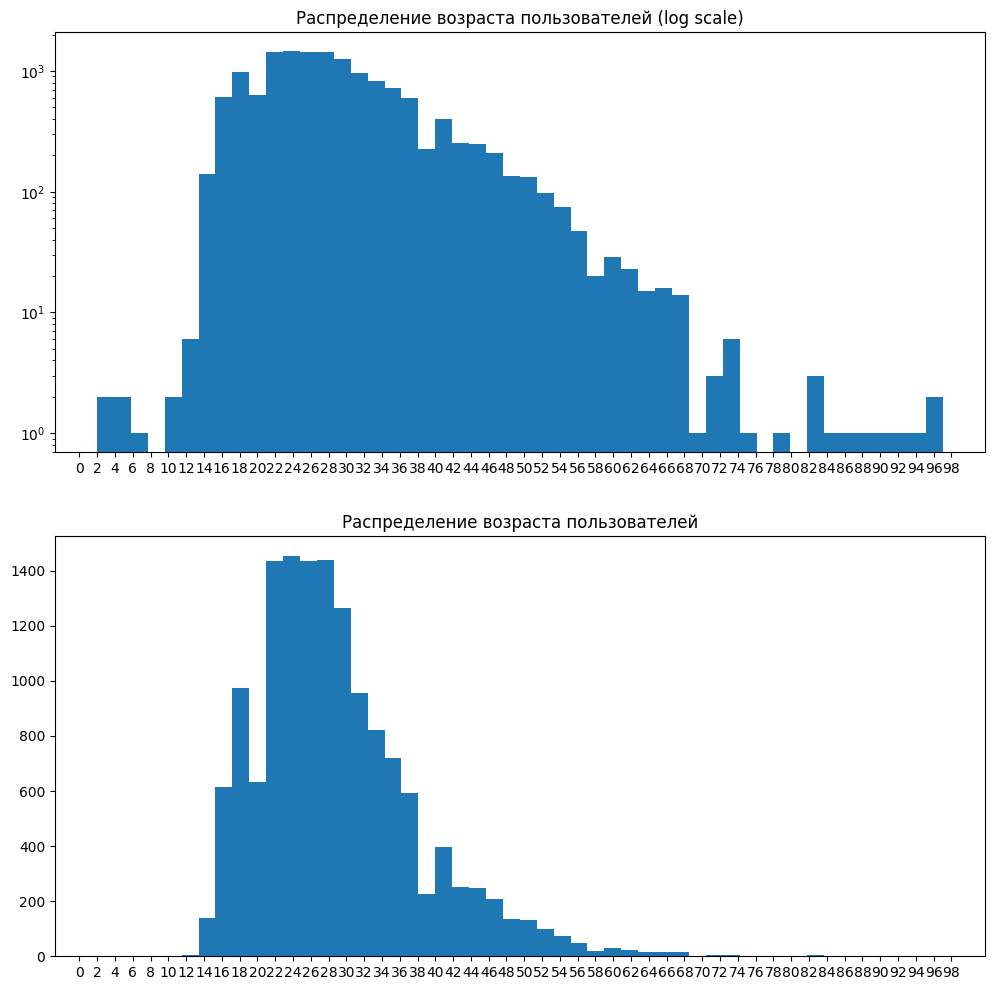

In [15]:
fig, axs = plt.subplots(2,1, figsize = (12, 12))

axs[0].hist(members_df_temp['bd'], bins = 50);
axs[0].set_yscale('log');
axs[0].set_title('Распределение возраста пользователей (log scale)')
axs[0].set_xticks(np.arange(0, 99, 2))

axs[1].hist(members_df_temp['bd'], bins = 50);
axs[1].set_title('Распределение возраста пользователей')
axs[1].set_xticks(np.arange(0, 99, 2))

plt.show()

В описании к датасету было указано, что у колонки 'bd' есть выбросы, что и наблюдается. Не редко пользователи приводят в социальных сетях неправильную информацию о своем возрасте, что может cделать этот признак ненадежным, но так как распределение выглядит адекватным (нет больших пиков например на значении 99) по этому поводу ничего не поделать

#### 'gender'

In [16]:
members_df[~members_df['gender'].isna()]['gender']

5        female
10         male
13       female
15         male
16         male
          ...  
34392      male
34393      male
34394      male
34396    female
34399      male
Name: gender, Length: 14501, dtype: object

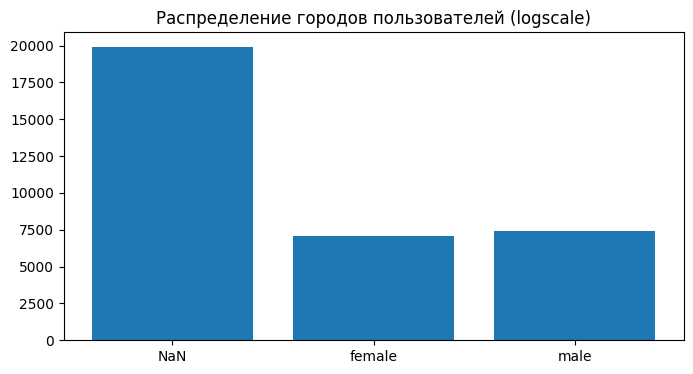

In [17]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

gender, counts = np.unique(members_df['gender'].fillna('NaN').values, return_counts=True)

ax.bar(np.arange(len(gender)), counts);
ax.set_title('Распределение городов пользователей (logscale)')
ax.set_xticks(np.arange(len(gender)));
ax.set_xticklabels(gender);
plt.show()

Пол пользователей хорошо сбалансирован, но и есть огромное число неизвестных значений

#### 'registered_via', 'registration_init_time', 'expiration_date'

In [18]:
members_df[['registration_init_time', 'expiration_date']].isna().sum()

registration_init_time    0
expiration_date           0
dtype: int64

Из описания датасета не очень ясно к чему относится 'expiration_date' видимо к дате окончания подписки на сервис с музыкой

Для визуализации переведем даты в datetime формат и вычислим длинну подписок

In [19]:
members_df['registration_init_time'] = pd.to_datetime(members_df['registration_init_time'], format='%Y%m%d', errors='coerce')
members_df['expiration_date'] = pd.to_datetime(members_df['expiration_date'], format='%Y%m%d', errors='coerce')

subscription_length = members_df['expiration_date'] - members_df['registration_init_time']

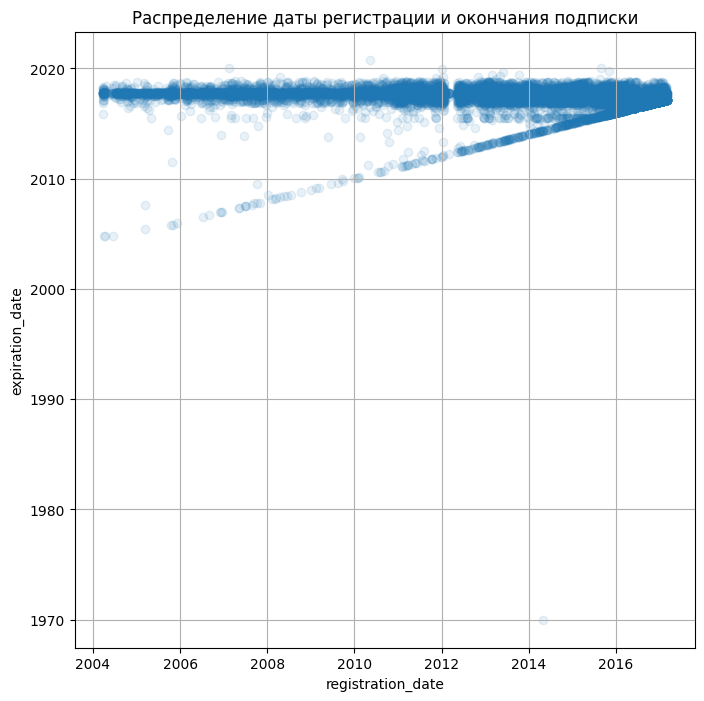

In [20]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

ax.scatter(members_df['registration_init_time'], members_df['expiration_date'], alpha=0.1);
ax.set_xlabel('registration_date');
ax.set_ylabel('expiration_date');
ax.grid(True)
ax.set_title('Распределение даты регистрации и окончания подписки');

Наблюдается ошибка в данных, где expiration_date меньше чем registration_date, уберем эту точку и может быть другие которые не так очевидны на графике 

In [21]:
bad_registration_date_idx = members_df['expiration_date'].dt.year < members_df['registration_init_time'].dt.year
members_df_temp = members_df[~bad_registration_date_idx]
print(f'убрали {sum(bad_registration_date_idx)} пользователей')

subscription_length = members_df_temp['expiration_date'] - members_df_temp['registration_init_time']

убрали 1 пользователей


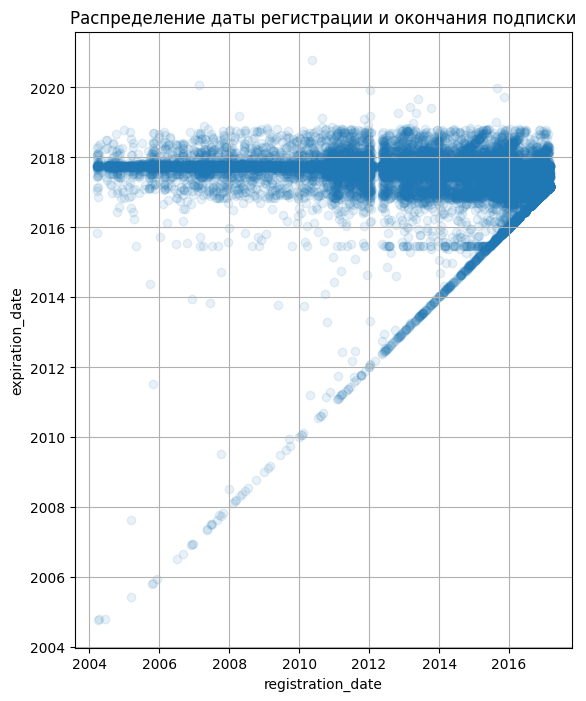

In [22]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

ax.scatter(members_df_temp['registration_init_time'], members_df_temp['expiration_date'], alpha=0.1);
ax.set_xlabel('registration_date');
ax.set_ylabel('expiration_date');
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.set_title('Распределение даты регистрации и окончания подписки');

Можно сделать два наблюдения: во-первых большое колличество подписок заканчивается в тот же год что и была регистрация, во-вторых подовляющее большинство подписок закончились в конце 2017 года. Касательно первого построим распределение длин подписок

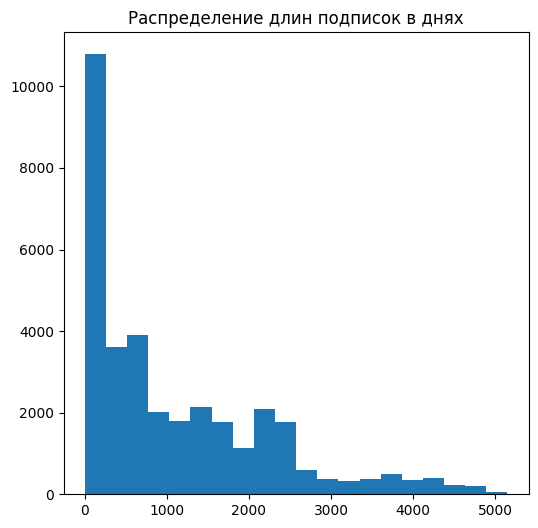

In [23]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

ax.hist(subscription_length.dt.days, bins = 20);
ax.set_title('Распределение длин подписок в днях');

Можно видеть что большая часть подписок длится ноль дней, видимо это некоторая пробная версия

Вообще говоря признаки касающиеся даты регистрации и 'expiration_date'(что бы это ни значило) не должны влиять на рекомендацию музыки, так как не имеют никакого отношения к вкусам пользователя

### songs.csv и songs_extra_info.csv

Объединим два датасета про треки

In [24]:
full_song_df = pd.merge(songs_df, songs_extra_info_df, on = 'song_id', how = 'outer')

In [25]:
full_song_df.isna().sum()

song_id              0
song_length        549
genre_ids        94665
artist_name        549
composer       1071907
lyricist       1945855
language           550
name               901
isrc            137446
dtype: int64

#### 'genre_ids'

In [26]:
full_songs_df_temp = full_song_df[~full_song_df['genre_ids'].isna()]

In [27]:
full_songs_df_temp['genre_ids'] = full_songs_df_temp['genre_ids'].apply(lambda x: list(map(int, x.split('|'))))

C:\Users\saaky\AppData\Local\Temp\ipykernel_17688\1831346736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_songs_df_temp['genre_ids'] = full_songs_df_temp['genre_ids'].apply(lambda x: list(map(int, x.split('|'))))


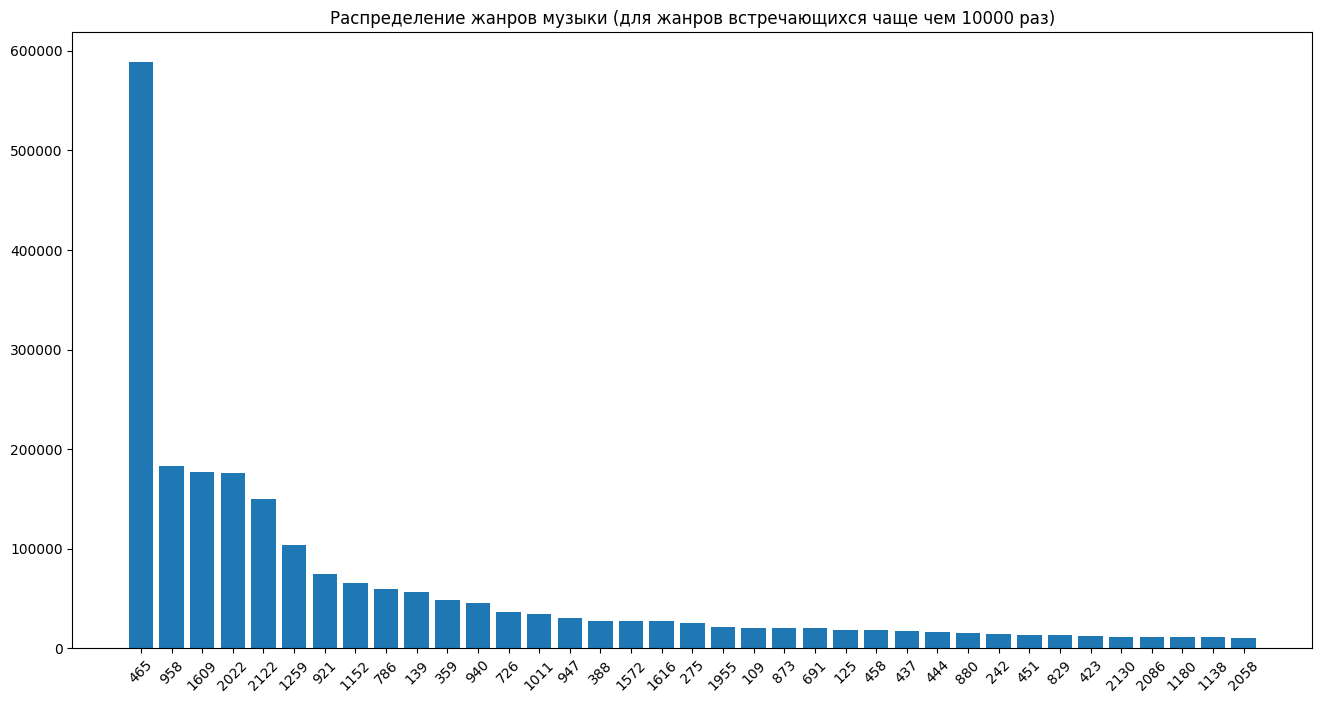

In [28]:
fig, ax = plt.subplots(1,1, figsize = (16, 8))

flattened_list = [item for sublist in full_songs_df_temp['genre_ids'] for item in sublist]

genres, counts = np.unique(flattened_list, return_counts=True)

sorted_indices = np.argsort(-counts)
genres = genres[sorted_indices]
counts = counts[sorted_indices]

genres = genres[counts > 10000]
counts = counts[counts > 10000]


ax.bar(np.arange(len(genres)), counts)

# Set x-tick labels to the genre numbers
ax.set_xticks(np.arange(len(genres)))
ax.set_xticklabels(genres, rotation = 45)

ax.set_title('Распределение жанров музыки (для жанров встречающихся чаще чем 10000 раз)')
plt.show()

Жанр номер 465 представлен значительно больше чем все остальные

#### 'artist_name'

C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39108 (\N{CJK UNIFIED IDEOGRAPH-98C4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35377 (\N{CJK UNIFIED IDEOGRAPH-8A31}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20896 (\N{CJK UNIFIED IDEOGRAPH-51A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 206

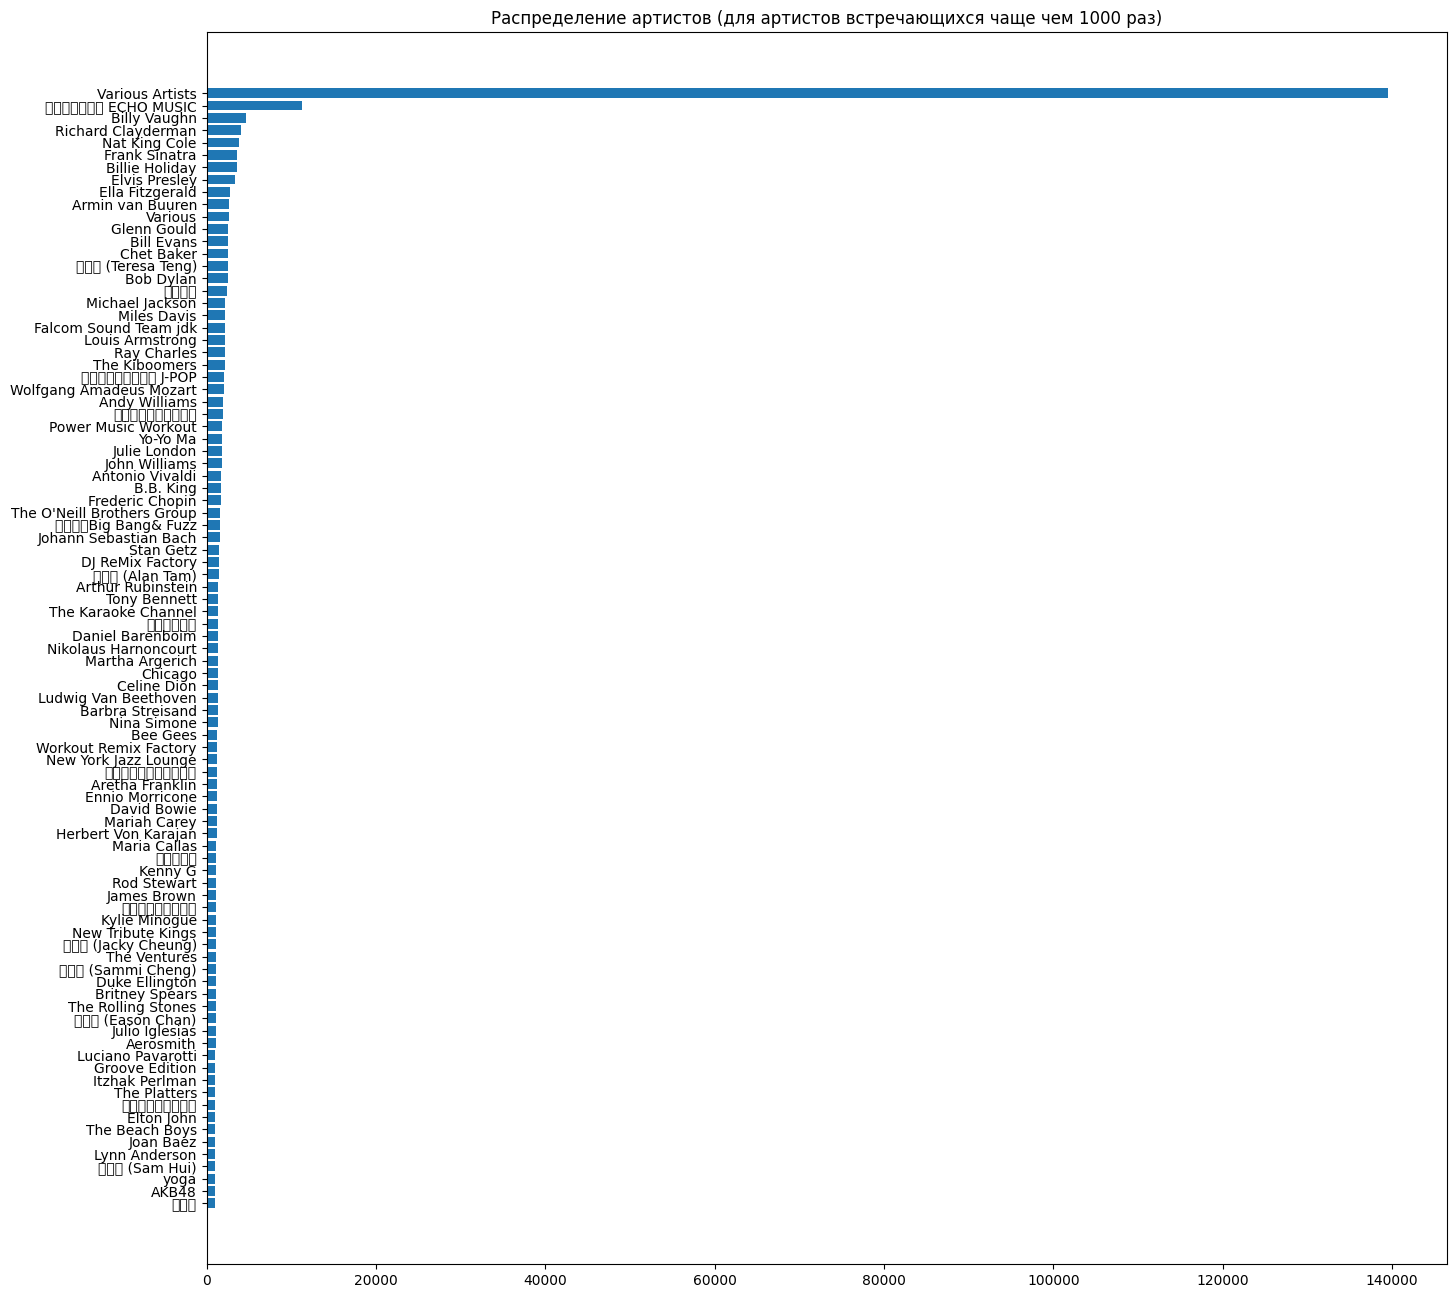

In [29]:
fig, ax = plt.subplots(1,1, figsize = (16, 16));

plt.rcParams['font.family'] = 'Microsoft YaHei'

flattened_list = full_songs_df_temp['artist_name'].values;

artist_names, counts = np.unique(flattened_list, return_counts=True);

sorted_indices = np.argsort(counts)
artist_names = artist_names[sorted_indices]
counts = counts[sorted_indices]


artist_names = artist_names[counts > 1000]
counts = counts[counts > 1000]


ax.barh(np.arange(len(artist_names)), counts);

# Set x-tick labels to the genre numbers
ax.set_yticks(np.arange(len(artist_names)));
ax.set_yticklabels(artist_names, ha = 'right');

ax.set_title('Распределение артистов (для артистов встречающихся чаще чем 1000 раз)');
plt.show();

Various Artists по очевидным причинам представлен значительно чаще чем другие, посмотрим на график без этого класса

C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3624 (\N{THAI CHARACTER SO SALA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saaky\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3636 (\N{THAI CHARACTER SA

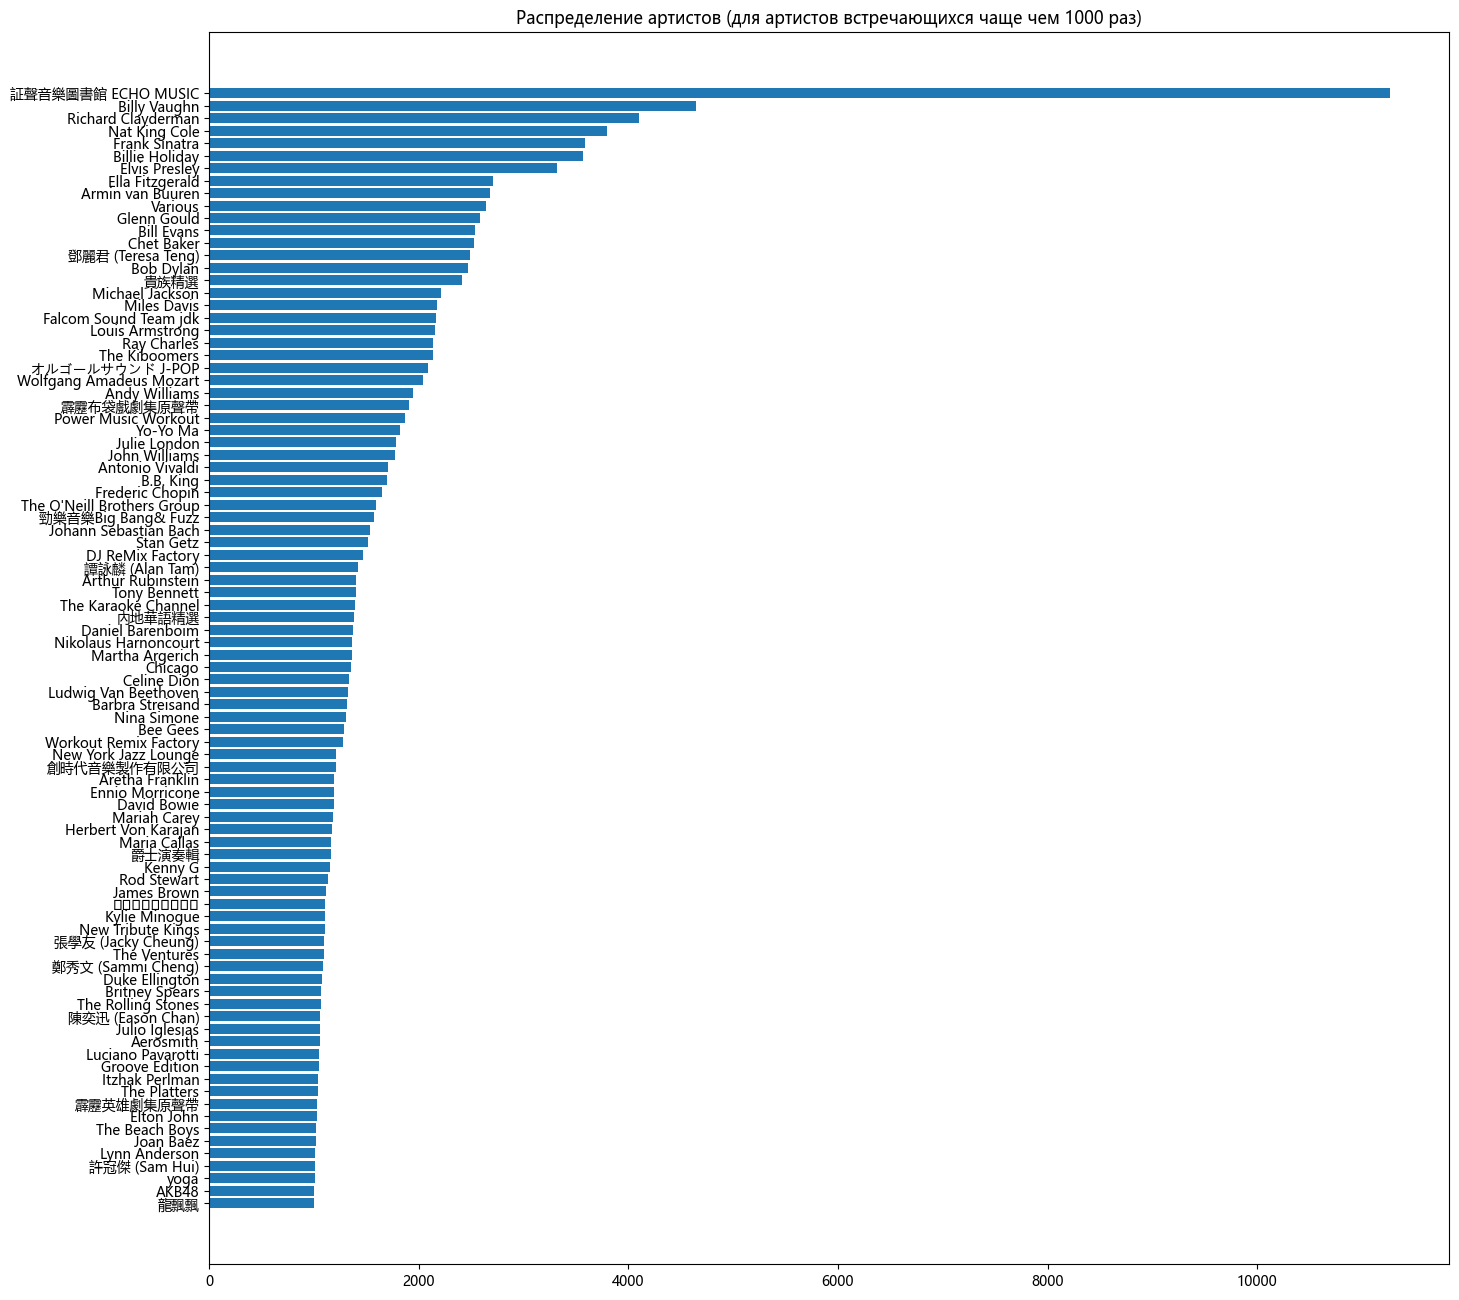

In [30]:
fig, ax = plt.subplots(1,1, figsize = (16, 16));

plt.rcParams['font.family'] = 'Microsoft YaHei'

flattened_list = full_songs_df_temp['artist_name'].values;

artist_names, counts = np.unique(flattened_list, return_counts=True);

sorted_indices = np.argsort(counts)
artist_names = artist_names[sorted_indices]
counts = counts[sorted_indices]

artist_names = artist_names[:-1]
counts = counts[:-1]

artist_names = artist_names[counts > 1000]
counts = counts[counts > 1000]


ax.barh(np.arange(len(artist_names)), counts);

# Set x-tick labels to the genre numbers
ax.set_yticks(np.arange(len(artist_names)));
ax.set_yticklabels(artist_names, ha = 'right');

ax.set_title('Распределение артистов (для артистов встречающихся чаще чем 1000 раз)');
plt.show();

#### 'song_length'

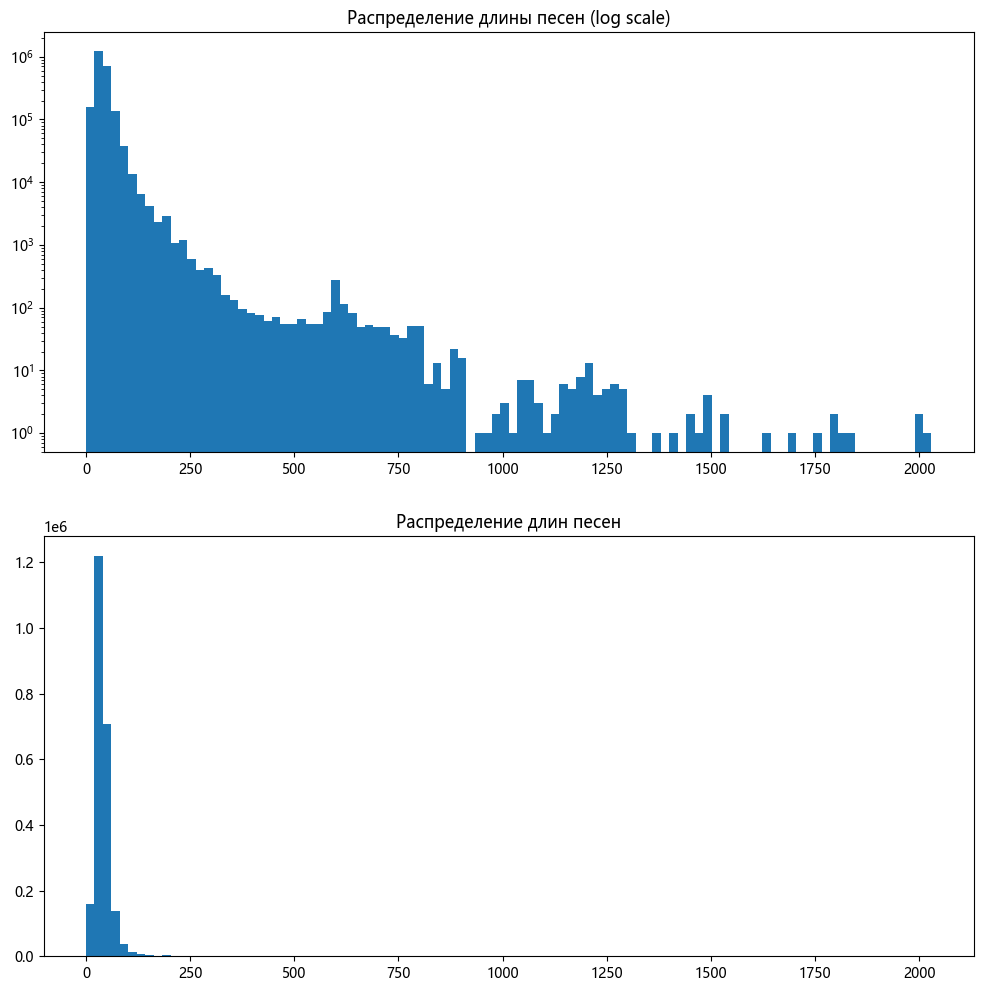

In [31]:
fig, axs = plt.subplots(2,1, figsize = (12, 12))

axs[0].hist(full_song_df['song_length']/6000, bins = 100);
axs[0].set_yscale('log');
axs[0].set_title('Распределение длины песен (log scale)')

axs[1].hist(full_song_df['song_length']/6000, bins = 100);
axs[1].set_title('Распределение длин песен')

plt.show()

Большинство песен имеют адекватную длинну в несколько минут, но есть и удивительно большое число с абсурдной длинной (>1000 минут)

#### 'language'

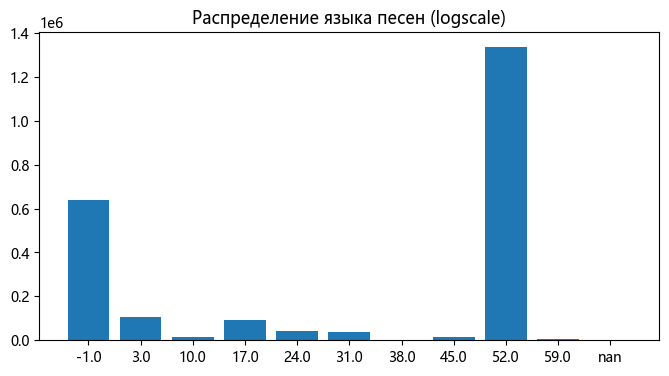

In [32]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

language, counts = np.unique(full_song_df['language'].values, return_counts=True)

ax.bar(np.arange(len(language)), counts);
ax.set_title('Распределение языка песен (logscale)')
ax.set_xticks(np.arange(len(language)));
ax.set_xticklabels(language);
plt.show()

-1 это скорее всего значение данное трекам без вокала на каком-либо языке. Подавляющее большинство песен относятся к языку номер 52, который видимо является основным языком страны в которой работает сервис

### train.csv

#### 'source_system_tab'

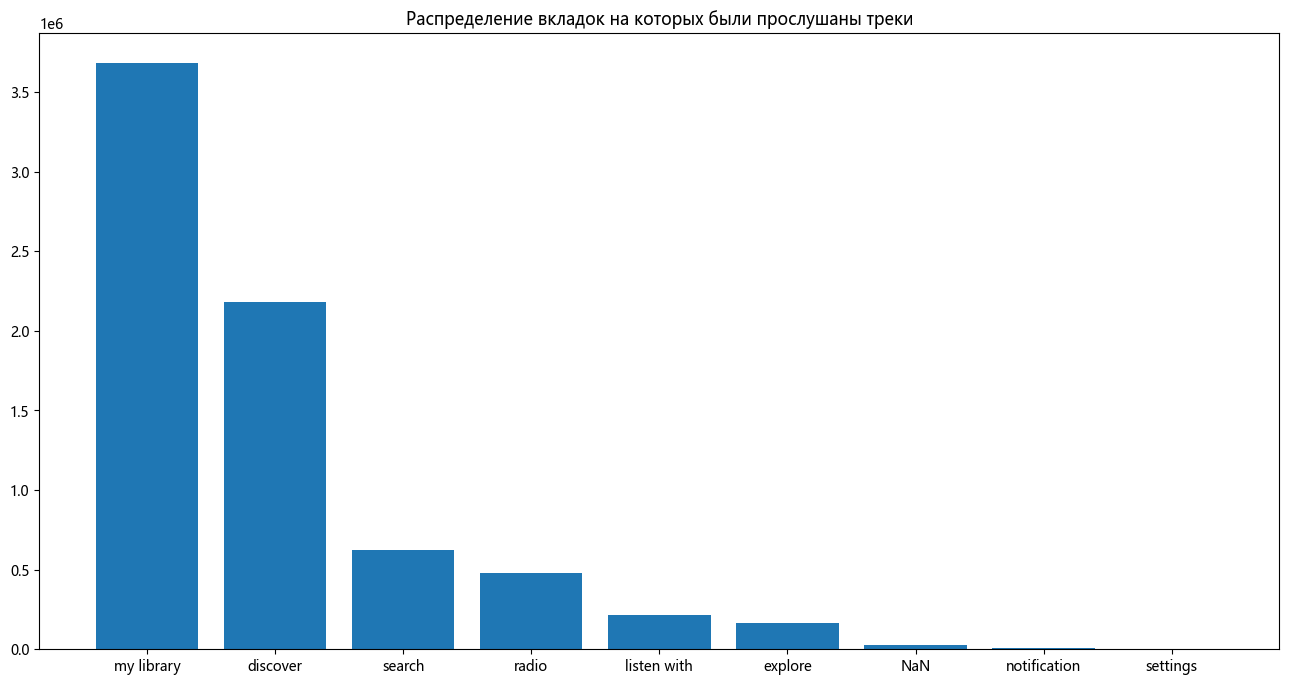

In [33]:
fig, ax = plt.subplots(1,1, figsize = (16, 8));

flattened_list = train_df['source_system_tab'].fillna('NaN').values;

artist_names, counts = np.unique(flattened_list, return_counts=True);

sorted_indices = np.argsort(-counts)
artist_names = artist_names[sorted_indices]
counts = counts[sorted_indices]


ax.bar(np.arange(len(artist_names)), counts);

# Set x-tick labels to the genre numbers
ax.set_xticks(np.arange(len(artist_names)));
ax.set_xticklabels(artist_names);

ax.set_title('Распределение вкладок на которых были прослушаны треки');
plt.show();

#### 'source_screen_name'

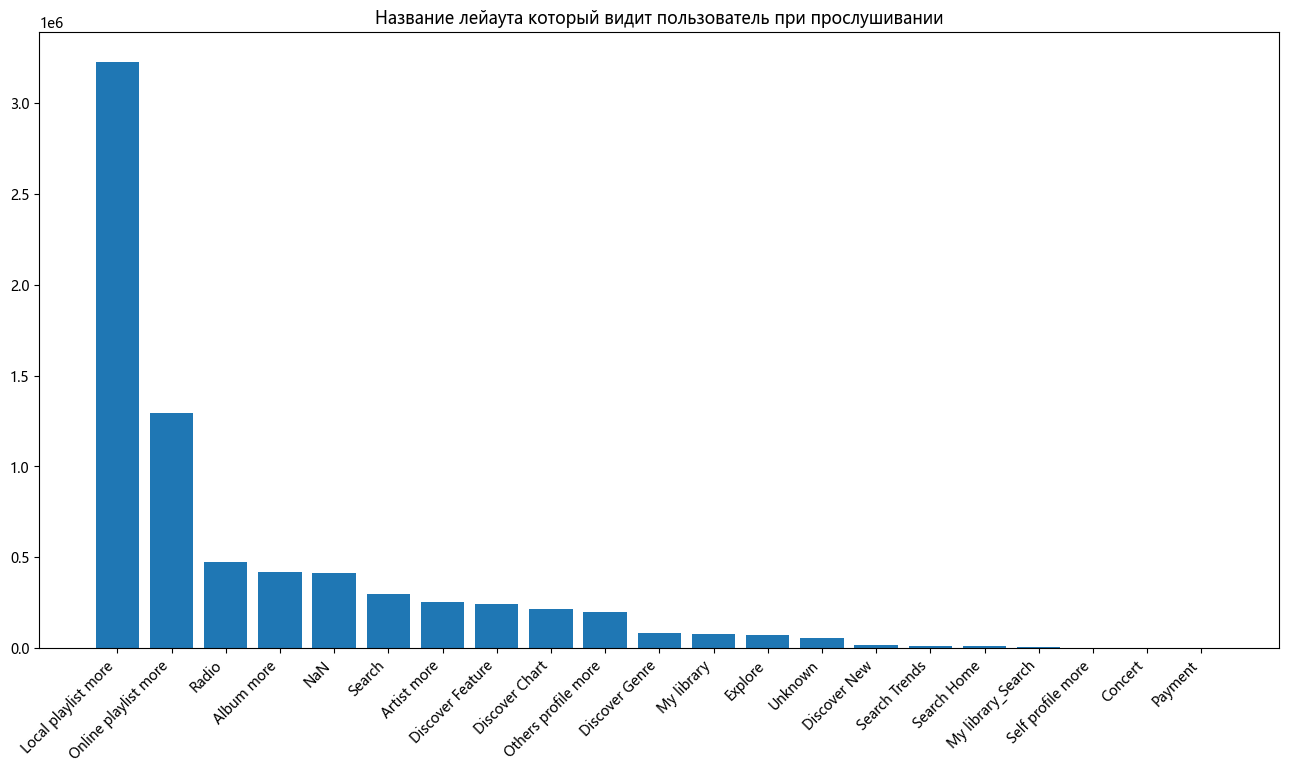

In [34]:
fig, ax = plt.subplots(1,1, figsize = (16, 8));

flattened_list = train_df['source_screen_name'].fillna('NaN').values;

artist_names, counts = np.unique(flattened_list, return_counts=True);

sorted_indices = np.argsort(-counts)
artist_names = artist_names[sorted_indices]
counts = counts[sorted_indices]


ax.bar(np.arange(len(artist_names)), counts);

# Set x-tick labels to the genre numbers
ax.set_xticks(np.arange(len(artist_names)));
ax.set_xticklabels(artist_names, rotation = 45, ha = 'right');

ax.set_title('Название лейаута который видит пользователь при прослушивании');
plt.show();

#### 'source_type'

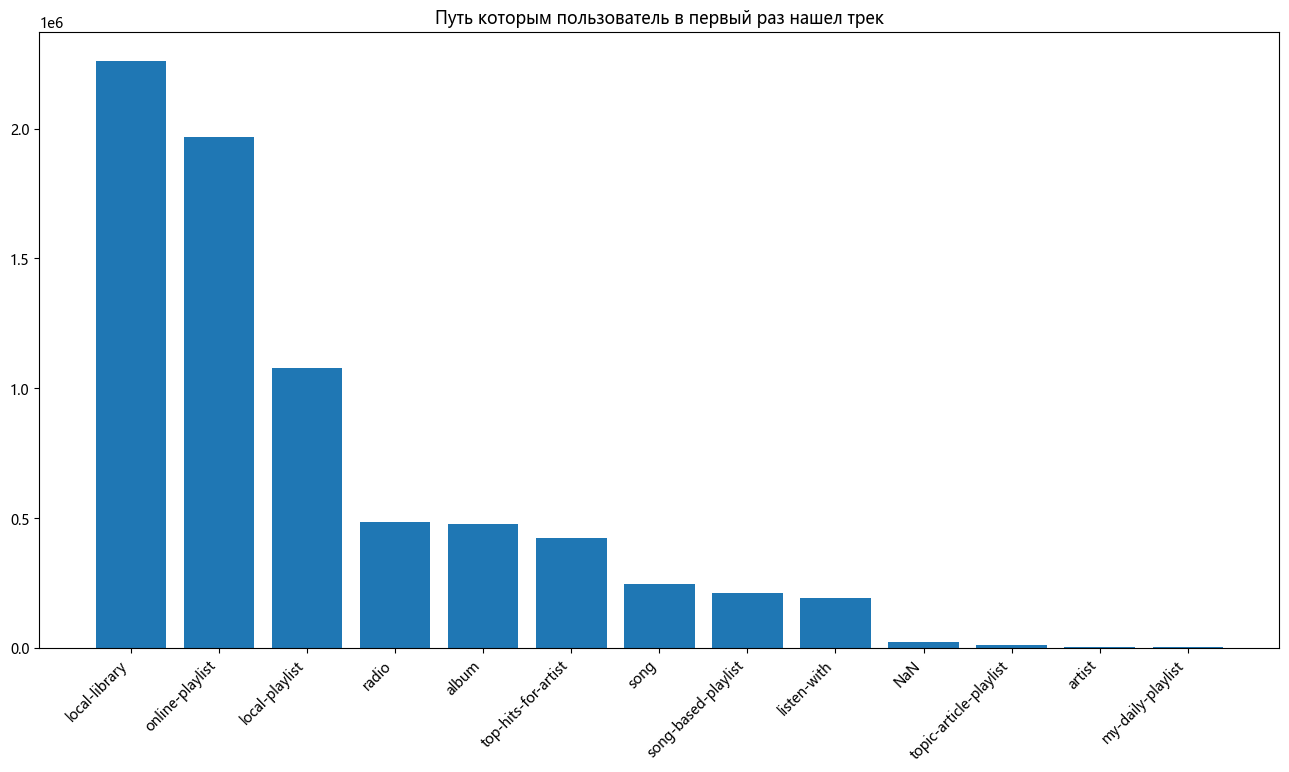

In [35]:
fig, ax = plt.subplots(1,1, figsize = (16, 8));

flattened_list = train_df['source_type'].fillna('NaN').values;

artist_names, counts = np.unique(flattened_list, return_counts=True);

sorted_indices = np.argsort(-counts)
artist_names = artist_names[sorted_indices]
counts = counts[sorted_indices]


ax.bar(np.arange(len(artist_names)), counts);

# Set x-tick labels to the genre numbers
ax.set_xticks(np.arange(len(artist_names)));
ax.set_xticklabels(artist_names, rotation = 45, ha = 'right');

ax.set_title('Путь которым пользователь в первый раз нашел трек');
plt.show();

### Пропущенные значения

Соберем весь датасет и разберемся с пропущенными значениями где это необходимо

In [36]:
full_train_df = pd.merge(train_df, members_df, on = 'msno', how = 'left')
full_train_df = pd.merge(full_train_df, full_song_df, on = 'song_id', how = 'left')

In [37]:
full_train_df.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178812
language                      150
name                         1457
isrc                       577858
dtype: int64

In [38]:
full_train_df.isna().mean()

msno                      0.000000
song_id                   0.000000
source_system_tab         0.003368
source_screen_name        0.056226
source_type               0.002920
target                    0.000000
city                      0.000000
bd                        0.000000
gender                    0.401425
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
song_length               0.000015
genre_ids                 0.016056
artist_name               0.000015
composer                  0.227140
lyricist                  0.430884
language                  0.000020
name                      0.000197
isrc                      0.078328
dtype: float64

Пройдем по всем полям и выберем способ работы с пропусками и решим нужно ли это поле вообще: <br /> <br /> msno - оставляем как есть <br /> <br /> song_id - то же самое <br /> <br /> source_system_tab - пропущенных данных не много, а сам факт их пропуска не несет информации, оставляем как есть <br /> <br /> source_screen_name то же самое  <br /> <br /> source_type то же самое <br /> <br /> target - оставляем как есть <br /> <br /> city - то же самое <br /> <br /> bd - заменим бессмысленные значения возраста медианным <br /> <br /> gender - так как классы сбалансированны нельзя предположить что все пропущенные принадлежат одному или другому, а заменять пропущенные значения случайным образом испортит зависимости которые могли бы быть, поэтому придется оставить как есть <br /> <br /> registered_via - не имеет отношения к вкусам пользователя, поэтому не берем <br /> <br /> registration_init_time то же самое <br /> <br /> expiration_date - то же самое <br /> <br /> song_length - заменим пропущенные значения медианным <br /> <br /> genre_ids - заменим пропущенные значения на класс 'без жанра', так как такие треки могут относится к какому-то еще не мейнстримному тренду или к загруженным пользователями трекам у которых заполнена не вся информация <br /> <br /> artist_name - заменим various artists на NaN так как этот класс очень часто представлен и при этом не несет в себе полезной информации <br /> <br /> composer - не берем, так как слишком много пропущенных данных и из опыта реальной жизни никто не знает композиторов песен <br /> <br /> lyricist то же самое <br /> <br /> language - заменим пропущенные значения на язык номер 52 так как он самый частый <br /> <br /> name - оставляем как есть

In [39]:
# bd
median_age = np.median(full_train_df[(full_train_df['bd'] > 0) & (full_train_df['bd'] <= 99)]['bd'])
full_train_df.loc[(full_train_df['bd'] <= 0) | (full_train_df['bd'] > 99), 'bd'] = median_age

# song_length
song_length_age = np.median(full_train_df['song_length'])
full_train_df.loc[(full_train_df['song_length'] <= 0) | (full_train_df['song_length'] > 99), 'bd'] = song_length_age

# genre_ids
full_train_df['genre_ids'] = full_train_df['genre_ids'].fillna('-1')

full_train_df['genre_1'] = full_train_df['genre_ids'].apply(lambda x: x.split('|')[0] if len(x.split('|')) > 0 else 'NaN')
full_train_df['genre_2'] = full_train_df['genre_ids'].apply(lambda x: x.split('|')[1] if len(x.split('|')) > 1 else 'NaN')
full_train_df['genre_3'] = full_train_df['genre_ids'].apply(lambda x: x.split('|')[2] if len(x.split('|')) > 2 else 'NaN')

full_train_df['genre_ids'] = full_train_df['genre_ids'].apply(lambda x: list(map(int, x.split('|'))))

# artist_name
full_train_df['artist_name'] = full_train_df['artist_name'].replace('Various Artists', np.nan)

# language
full_train_df['language'] = full_train_df['language'].fillna(52)
full_train_df['language'] = full_train_df['language'].apply(lambda x: int(x))

# Feature engineering

В обучающих данных представленны записи общего вида ['user_id', 'song_id', 'target'], где таргет равен 1 или 0 в зависимости от того есть ли повторные прослушивания или нет. Это значит, что даже записи с 'target' = 0 говорят о том что пользователь послушал данный трек хоть один раз. Из этого извлечем для каждого пользователя топ жанров, артистов и языков, относящихся к трекам которые они послушали.

In [40]:
most_common_genres = full_train_df.groupby('msno')['genre_ids'].agg(lambda x: pd.Series(x).explode().value_counts().head(3).index.tolist())
most_common_genres = most_common_genres.reset_index()

most_common_genres['most_common_genre1'] = most_common_genres['genre_ids'].apply(lambda x: x[0] if len(x) > 0 else 'NaN')
most_common_genres['most_common_genre2'] = most_common_genres['genre_ids'].apply(lambda x: x[1] if len(x) > 1 else 'NaN')
most_common_genres['most_common_genre3'] = most_common_genres['genre_ids'].apply(lambda x: x[2] if len(x) > 2 else 'NaN')

most_common_genres.drop(columns=['genre_ids'], inplace=True)

full_train_df = pd.merge(full_train_df, most_common_genres, on='msno', how='left')

In [41]:
most_common_artists = full_train_df.groupby('msno')['artist_name'].agg(lambda x: pd.Series(x).value_counts().head(3).index.tolist())
most_common_artists = most_common_artists.reset_index()

most_common_artists['most_common_artist1'] = most_common_artists['artist_name'].apply(lambda x: x[0] if len(x) > 0 else 'NaN')
most_common_artists['most_common_artist2'] = most_common_artists['artist_name'].apply(lambda x: x[1] if len(x) > 1 else 'NaN')
most_common_artists['most_common_artist3'] = most_common_artists['artist_name'].apply(lambda x: x[2] if len(x) > 2 else 'NaN')

most_common_artists.drop(columns=['artist_name'], inplace=True)

full_train_df = pd.merge(full_train_df, most_common_artists, on='msno', how='left')

In [42]:
most_common_language = full_train_df.groupby('msno')['language'].agg(lambda x: pd.Series(x).value_counts().head(3).index.tolist())
most_common_language = most_common_language.reset_index()

most_common_language['most_common_language1'] = most_common_language['language'].apply(lambda x: x[0] if len(x) > 0 else 'NaN')
most_common_language['most_common_language2'] = most_common_language['language'].apply(lambda x: x[1] if len(x) > 1 else 'NaN')
most_common_language['most_common_language3'] = most_common_language['language'].apply(lambda x: x[2] if len(x) > 2 else 'NaN')

most_common_language.drop(columns=['language'], inplace=True)

full_train_df = pd.merge(full_train_df, most_common_language, on='msno', how='left')

In [43]:
full_train_df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc',
       'genre_1', 'genre_2', 'genre_3', 'most_common_genre1',
       'most_common_genre2', 'most_common_genre3', 'most_common_artist1',
       'most_common_artist2', 'most_common_artist3', 'most_common_language1',
       'most_common_language2', 'most_common_language3'],
      dtype='object')

In [44]:
columns_to_keep = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 
                   'source_type', 'target', 'city', 'bd', 'gender',
                   'genre_1', 'genre_2', 'genre_3',
                   'most_common_genre1', 'most_common_genre2', 'most_common_genre3',
                   'most_common_artist1', 'most_common_artist2', 'most_common_artist3',
                   'most_common_language1', 'most_common_language2', 'most_common_language3',
                   'song_length', 'artist_name',
                   'language', 'name']

cat_features = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 
                'source_type', 'city', 'gender',
                'genre_1', 'genre_2', 'genre_3',
                'most_common_genre1', 'most_common_genre2', 'most_common_genre3',
                'most_common_artist1', 'most_common_artist2', 'most_common_artist3',
                'most_common_language1', 'most_common_language2', 'most_common_language3',
                'artist_name',
                'language', 'name']

In [45]:
final_train_df = full_train_df[columns_to_keep]